In [13]:
%matplotlib inline

# Creating a GeoDataFrame from a DataFrame with coordinates
---------------------------------------------------------

This example shows how to create a ``GeoDataFrame`` when starting from
a *regular* ``DataFrame`` that has coordinates either WKT
(`well-known text <https://en.wikipedia.org/wiki/Well-known_text>`_)
format, or in
two columns.

In [15]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

From longitudes and latitudes
=============================

First, let's consider a ``DataFrame`` containing cities and their respective
longitudes and latitudes.



In [7]:
df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
     'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]})

A ``GeoDataFrame`` needs a ``shapely`` object. We use geopandas
``points_from_xy()`` to transform **Longitude** and **Latitude** into a list
of ``shapely.Point`` objects and set it as a ``geometry`` while creating the
``GeoDataFrame``. (note that ``points_from_xy()`` is an enhanced wrapper for
``[Point(x, y) for x, y in zip(df.Longitude, df.Latitude)]``)



In [8]:
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))

``gdf`` looks like this :



In [9]:
print(gdf.head())

           City    Country  Latitude  Longitude               geometry
0  Buenos Aires  Argentina    -34.58     -58.66  POINT (-58.66 -34.58)
1      Brasilia     Brazil    -15.78     -47.91  POINT (-47.91 -15.78)
2      Santiago      Chile    -33.45     -70.66  POINT (-70.66 -33.45)
3        Bogota   Colombia      4.60     -74.08     POINT (-74.08 4.6)
4       Caracas  Venezuela     10.48     -66.86   POINT (-66.86 10.48)


Finally, we plot the coordinates over a country-level map.



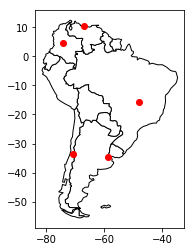

In [10]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'South America'].plot(
    color='white', edgecolor='black')

# We can now plot our GeoDataFrame.
gdf.plot(ax=ax, color='red')

plt.show()

In [17]:
In [14]: import matplotlib.pyplot as plt
 
In [15]: fig, ax = plt.subplots()
 
# set aspect to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.
In [16]: ax.set_aspect('equal')
 
In [17]: world.plot(ax=ax, color='white', edgecolor='black')
Out[17]: <matplotlib.axes._subplots.AxesSubplot at 0x7fb7ac190048>
 
In [18]: cities.plot(ax=ax, marker='o', color='red', markersize=5)
Out[18]: <matplotlib.axes._subplots.AxesSubplot at 0x7fb7ac190048>
 
In [19]: plt.show();


SyntaxError: invalid syntax (<ipython-input-17-c55c5d8143fd>, line 11)

From WKT format
===============
Here, we consider a ``DataFrame`` having coordinates in WKT format.



In [12]:
From WKT format
===============
Here, we consider a ``DataFrame`` having coordinates in WKT format.

SyntaxError: invalid syntax (<ipython-input-12-83f0f6d9a418>, line 1)

From WKT format
===============
Here, we consider a ``DataFrame`` having coordinates in WKT format.



From WKT format
===============
Here, we consider a ``DataFrame`` having coordinates in WKT format.



In [11]:
df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Coordinates': ['POINT(-34.58 -58.66)', 'POINT(-15.78 -47.91)',
                     'POINT(-33.45 -70.66)', 'POINT(4.60 -74.08)',
                     'POINT(10.48 -66.86)']})

We use ``shapely.wkt`` sub-module to parse wkt format:



In [8]:
from shapely import wkt

df['Coordinates'] = df['Coordinates'].apply(wkt.loads)

The ``GeoDataFrame`` is constructed as follows :



In [9]:
gdf = geopandas.GeoDataFrame(df, geometry='Coordinates')

print(gdf.head())

           City    Country            Coordinates
0  Buenos Aires  Argentina  POINT (-34.58 -58.66)
1      Brasilia     Brazil  POINT (-15.78 -47.91)
2      Santiago      Chile  POINT (-33.45 -70.66)
3        Bogota   Colombia     POINT (4.6 -74.08)
4       Caracas  Venezuela   POINT (10.48 -66.86)
